** A few sub-tables / queries potentially usefull for SAPS II computation **

This part deals with the OMOP replication of the simplified acute physiology score II (SAPS II) calculated with MIMIC here:

https://github.com/MIT-LCP/mimic-code/blob/master/concepts/severityscores/sapsii.sql

In addition to the severity score computation, elementary EDA will be performed around its components to handle how their call through OMOP.

* Load librairies / Access the DB

In [1]:
import numpy as np
omop_login = np.load('full_omop_login.npy').item()

from fleming_lib.tools import connect_to_omop
conn = connect_to_omop(login_dict=omop_login)

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

* Example 

In [2]:
query = """
SELECT * 
FROM person
LIMIT 10;
"""
pd.read_sql_query(query, conn)

,person_id,gender_concept_id,gender_concept_name,gender_concept_code,gender_concept_code_system,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,...,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,62065089,8532,FEMALE,F,Gender,2107,6,29,2107-06-29,8515,...,None,None,None,None,F,None,ASIAN,None,None,None
1,62106569,8507,MALE,M,Gender,2047,11,1,2047-11-01,8515,...,None,None,None,None,M,None,ASIAN,None,None,None
2,62073299,8532,FEMALE,F,Gender,2190,4,23,2190-04-23,8515,...,None,None,None,None,F,None,ASIAN,None,None,None
3,62096906,8507,MALE,M,Gender,2182,9,7,2182-09-07,8515,...,None,None,None,None,M,None,ASIAN,None,None,None
4,62102055,8507,MALE,M,Gender,2087,2,28,2087-02-28,8515,...,None,None,None,None,M,None,ASIAN,None,None,None
5,62106786,8532,FEMALE,F,Gender,2161,3,31,2161-03-31,8515,...,None,None,None,None,F,None,ASIAN,None,None,None
6,62083063,8532,FEMALE,F,Gender,2125,12,16,2125-12-16,8515,...,None,None,None,None,F,None,ASIAN,None,None,None
7,62078234,8507,MALE,M,Gender,2110,6,19,2110-06-19,8515,...,None,None,None,None,M,None,ASIAN,None,None,None
8,62065073,8532,FEMALE,F,Gender,2074,5,27,2074-05-27,8515,...,None,None,None,None,F,None,ASIAN,None,None,None
9,62100837,8532,FEMALE,F,Gender,2136,7,22,2136-07-22,8515,...,None,None,None,None,F,None,ASIAN,None,None,None


* ICU STAYS : Number of patients

In [3]:
query = """
SELECT COUNT(distinct visit_detail_id) AS num_totalstays_count
FROM visit_detail
WHERE visit_detail_concept_id = 581382                             -- concept.concept_name = 'Inpatient Intensive Care Facility'
AND visit_type_concept_id = 2000000006;                            -- concept.concept_name = 'Ward and physical location'
"""
pd.read_sql_query(query, conn)

,num_totalstays_count
0,71575


* ICU STAYS : Components

In [4]:
query_icu = """
SELECT *
FROM visit_detail
WHERE visit_detail_concept_id = 581382              
AND visit_type_concept_id = 2000000006
LIMIT 10; 
"""
pd.read_sql_query(query_icu, conn)

,visit_detail_id,person_id,visit_detail_concept_id,visit_detail_concept_name,visit_detail_concept_code,visit_detail_concept_code_system,visit_start_date,visit_start_datetime,visit_end_date,visit_end_datetime,...,admitting_source_concept_id,discharge_to_concept_id,discharge_concept_name,discharge_concept_code,discharge_concept_code_system,discharge_to_source_value,discharge_to_source_concept_id,preceding_visit_detail_id,visit_detail_parent_id,visit_occurrence_id
0,66882284,62071067,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2188-02-21,2188-02-21 05:37:39,2188-02-23,2188-02-23 19:28:57,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,12866
1,66854999,62065487,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2176-11-23,2176-11-23 05:39:58,2176-11-26,2176-11-26 03:04:21,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,2109
2,66973260,62086394,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2141-10-04,2141-10-04 15:54:37,2141-10-05,2141-10-05 18:25:08,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,25878
3,66844817,62065311,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2127-12-19,2127-12-19 21:49:00,2127-12-22,2127-12-22 07:32:00,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,1830
4,66987130,62096656,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2126-08-05,2126-08-05 22:06:05,2126-08-12,2126-08-12 17:05:18,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,35423
5,66850563,62067175,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2141-12-07,2141-12-07 00:57:11,2141-12-08,2141-12-08 16:03:23,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,3716
6,66886573,62075101,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2134-12-02,2134-12-02 11:57:55,2134-12-02,2134-12-02 19:59:27,...,None,4216643,Patient died,397709008,SNOMED,DEAD/EXPIRED,None,None,None,14040
7,67042705,62099984,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2119-09-11,2119-09-11 12:09:09,2119-09-13,2119-09-13 06:26:33,...,None,4216643,Patient died,397709008,SNOMED,DEAD/EXPIRED,None,None,None,46553
8,66936271,62080774,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2179-12-28,2179-12-28 23:59:20,2180-02-26,2180-02-26 17:47:01,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,22814
9,67020308,62091915,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2153-04-13,2153-04-13 05:57:55,2153-04-14,2153-04-14 18:16:11,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,43727


* ICU STAYS : Encapsulation

In [5]:
query_icu = """
WITH ie AS                                                 -- Equivalent to icustays
( SELECT *
  FROM visit_detail
  WHERE visit_detail_concept_id = 581382              
  AND visit_type_concept_id = 2000000006 
)

SELECT *
FROM ie
LIMIT 10;
"""
pd.read_sql_query(query_icu, conn)

,visit_detail_id,person_id,visit_detail_concept_id,visit_detail_concept_name,visit_detail_concept_code,visit_detail_concept_code_system,visit_start_date,visit_start_datetime,visit_end_date,visit_end_datetime,...,admitting_source_concept_id,discharge_to_concept_id,discharge_concept_name,discharge_concept_code,discharge_concept_code_system,discharge_to_source_value,discharge_to_source_concept_id,preceding_visit_detail_id,visit_detail_parent_id,visit_occurrence_id
0,66882284,62071067,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2188-02-21,2188-02-21 05:37:39,2188-02-23,2188-02-23 19:28:57,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,12866
1,66854999,62065487,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2176-11-23,2176-11-23 05:39:58,2176-11-26,2176-11-26 03:04:21,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,2109
2,66973260,62086394,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2141-10-04,2141-10-04 15:54:37,2141-10-05,2141-10-05 18:25:08,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,25878
3,66844817,62065311,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2127-12-19,2127-12-19 21:49:00,2127-12-22,2127-12-22 07:32:00,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,1830
4,66987130,62096656,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2126-08-05,2126-08-05 22:06:05,2126-08-12,2126-08-12 17:05:18,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,35423
5,66850563,62067175,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2141-12-07,2141-12-07 00:57:11,2141-12-08,2141-12-08 16:03:23,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,3716
6,66886573,62075101,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2134-12-02,2134-12-02 11:57:55,2134-12-02,2134-12-02 19:59:27,...,None,4216643,Patient died,397709008,SNOMED,DEAD/EXPIRED,None,None,None,14040
7,67042705,62099984,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2119-09-11,2119-09-11 12:09:09,2119-09-13,2119-09-13 06:26:33,...,None,4216643,Patient died,397709008,SNOMED,DEAD/EXPIRED,None,None,None,46553
8,66936271,62080774,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2179-12-28,2179-12-28 23:59:20,2180-02-26,2180-02-26 17:47:01,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,22814
9,67020308,62091915,581382,Inpatient Intensive Care Facility,OMOP generated,Place of Service,2153-04-13,2153-04-13 05:57:55,2153-04-14,2153-04-14 18:16:11,...,None,4030023,Patient transfer,107724000,SNOMED,transfer,None,None,None,43727


* MEASUREMENT table:

Regarding the OMOP's MEASUREMENT table, containing structured values available in MIMIC's chartevents, let's see how to perform the filtering of chartevents' itemid with OMOP.

More precisely, the score computation requieres to extract CPAP with itemid taking the values : 467, 469 and 226732; corresponding to the labels : O2 Delivery Device, O2 Delivery Mode and O2 Delivery Device(s).

Here is the OMOP associated mapping to these "Oxygen Delivery Device" fields.

In [6]:
query = """
SELECT * from concept where concept_code in ('467', '469','226732')
ORDER BY concept_code 
;
"""
pd.read_sql_query(query, conn)

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
0,2001030754,label:[O2 Delivery Device(s)]dbsource:[metavis...,Measurement,MIMIC d_items,Respiratory,None,226732,1979-01-01,2099-01-01,None
1,2001019143,label:[O2 Delivery Device]dbsource:[carevue]li...,Measurement,MIMIC d_items,None,None,467,1979-01-01,2099-01-01,None
2,2001042863,Right Extremities:,Note Nlp,MIMIC Generated,Section,None,467,1979-01-01,2099-01-01,None
3,38000765,Other Factors Influencing Health Status,Observation,DRG,DRG,None,467,1970-01-01,2099-12-31,D
4,38001256,Revision of hip or knee replacement w CC,Observation,DRG,MS-DRG,S,467,1970-01-01,2099-12-31,None
5,2001042865,VAP bundle:,Note Nlp,MIMIC Generated,Section,None,469,1979-01-01,2099-01-01,None
6,38001258,Major joint replacement or reattachment of low...,Observation,DRG,MS-DRG,S,469,1970-01-01,2099-12-31,None
7,2001019145,label:[O2 Delivery Mode]dbsource:[carevue]link...,Measurement,MIMIC d_items,None,None,469,1979-01-01,2099-01-01,None
8,38000767,Principal Diagnosis Invalid As Discharge Diagn...,Observation,DRG,DRG,None,469,1970-01-01,2099-12-31,D


Let's try to retrieve the measurement_id we need from the measurement_source_concept_id supposed to be the same than the concept_id shown above.

In [56]:
query = """
SELECT measurement_id
FROM measurement
WHERE measurement_source_concept_id IN (
2001030754, 
2001019143,
2001042863,
38000765,
38001256,
2001042865,
38001258,
2001019145,
38000767
)
;
"""
pd.read_sql_query(query, conn)

,measurement_id
0,1290494587
1,1290544903
2,1290662640
3,1286261251
4,1286286425
5,1286299543
6,1286344171
7,1286486878
8,1077073417
9,1077073636


* Some biological concepts and their approximated distributions :

If we're given LOIC local_concept_id, the same than above applies to extract corresponding measurement_concept_id:

In [7]:
query = """
SELECT distinct measurement_concept_name, measurement_concept_id
FROM measurement
WHERE measurement_source_concept_id IN (
2001031083,   -- pH (acidity) in blood
2001031248,   -- Sodium serum/plasma
2001031235,   -- Potassium serum/plasma 
2001031483,   -- Hematocrit [Volume Fraction] of Blood by Automated count
2001031563,   -- Leukocytes [#/volume] in Blood by Manual count
2001031149,   -- Total Bilirubin serum/plasma
2001031527)   -- Platelets [#/volume] in Blood by Automated count
;
"""
pd.read_sql_query(query, conn)

,measurement_concept_name,measurement_concept_id
0,Hematocrit [Volume Fraction] of Blood by Autom...,3023314
1,Leukocytes [#/volume] in Blood by Manual count,3003282
2,Total Bilirubin serum/plasma,3024128
3,Potassium serum/plasma,3023103
4,Sodium serum/plasma,3019550
5,Platelets [#/volume] in Blood by Automated count,3024929
6,pH (acidity) in blood,3010421


Example on measurement_concept_name = Sodium serum/plasma ("Natrémie" in french)

WARNING: We will consider the 1000 first persons in the ICU without any other kind of filtering! 
As such, the following may not be representative of the cohort we'll consider afterwards for the predictive part. 

In [8]:
query_icu_natremie = """
WITH ie AS                          -- Equivalent to icustays
( SELECT *
  FROM visit_detail
  WHERE visit_detail_concept_id = 581382              
  AND visit_type_concept_id = 2000000006 
  
), natremie as 

( SELECT *
  FROM measurement
  WHERE measurement_concept_id = 3019550
)

SELECT value_as_number
FROM natremie        
INNER JOIN ie ON ie.person_id=natremie.person_id
LIMIT 1000;

"""
df_icu_natremie = pd.read_sql_query(query_icu_natremie, conn)

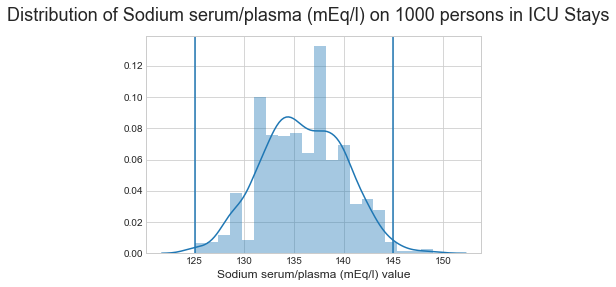

In [9]:
fig = sns.distplot(df_icu_natremie["value_as_number"], bins=20)
fig.figure.suptitle("Distribution of Sodium serum/plasma (mEq/l) on 1000 persons in ICU Stays", fontsize = 18)
plt.xlabel('Sodium serum/plasma (mEq/l) value', fontsize=12)
plt.axvline(125)
plt.axvline(145)

The vertical lines correspond to the domains of this value's contribution to the SAPS II score as follows:

- Below 125 mEq/l           : 5
- Between 125 and 144 mEq/l : 0 
- Above 145 mEq/l           : 1

Same for Potassium serum/plasma ("Kaliémie"):

- Below 3 mEq/l           : 3
- Between 3 and 4,9 mEq/l : 0 
- Above 5 mEq/l           : 1

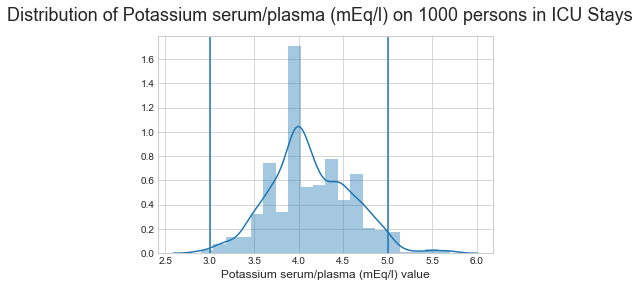

In [10]:
query_icu_kaliemie = """

WITH ie AS                          -- Equivalent to icustays
( SELECT *
  FROM visit_detail
  WHERE visit_detail_concept_id = 581382              
  AND visit_type_concept_id = 2000000006 
  
), natremie as 

( SELECT *
  FROM measurement
  WHERE measurement_concept_id = 3023103
)

SELECT value_as_number
FROM natremie        
INNER JOIN ie ON ie.person_id=natremie.person_id
LIMIT 1000;

"""
df_icu_kaliemie = pd.read_sql_query(query_icu_kaliemie, conn)
fig = sns.distplot(df_icu_kaliemie["value_as_number"], bins=20)
fig.figure.suptitle("Distribution of Potassium serum/plasma (mEq/l) on 1000 persons in ICU Stays", fontsize = 18)
plt.xlabel('Potassium serum/plasma (mEq/l) value', fontsize=12)
plt.axvline(3)
plt.axvline(5)

* ICU STAYS : Full score computation (so far... DOES NOT WORK)

In [ ]:
query = """
WITH ie AS                          -- Equivalent to icustays
( SELECT *
  FROM visit_detail
  WHERE visit_detail_concept_id = 581382              
  AND visit_type_concept_id = 2000000006 
  
) , cpap AS           

( SELECT distinct ie.person_id,                     
    , min(measurement_datetime - interval '1' hour) as starttime
    , max(measurement_datetime + interval '4' hour) as endtime     
    -- the previous is used to take measurement_datetime uncertainty into consideration 
    ,max(case when lower(me.value_source_value) similar to '%(cpap mask|bipap mask)%' then 1 else 0 end) as cpap
    
  FROM ie
  
  INNER JOIN measurement me         -- chartevents have been mapped onto MEASUREMENT and OBSERVATION on OMOP
    ON ie.person_id=me.person_id
    AND me.measurement_datetime between ie.visit_start_datetime and ie.visit_start_datetime + interval '1' day 
  
  WHERE measurement_id in (???)
  AND lower(me.value_source_value) similar to '%(cpap mask|bipap mask)%'
  group by ie.person_id
  
)

"""

pd.read_sql_query(query, conn)